1.LIBRARIES USED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-dark')

<ipython-input-3-b24536ef7348>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [ ]:
df=pd.read_csv('/content/Stud_performance.csv')
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [ ]:
df.shape

(1000, 8)

2. MODIFYING DATA

In [ ]:
df['maths score']=df['math percentage']*100
df['reading score']=df['reading score percentage']*100
df['writing score']=df['writing score percentage']*100
df['average']=(df['maths score']+df['reading score']+df['writing score'])/3

In [ ]:
df1=df.drop(['math percentage','reading score percentage','writing score percentage'],axis=1)

:1 represents rounding off average to 1 decimal point.

In [ ]:
df1=df1.round({'average':1})
df1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex,maths score,reading score,writing score,average
0,group B,bachelor's degree,standard,none,F,72.0,72.0,74.0,72.7
1,group C,some college,standard,completed,F,69.0,90.0,88.0,82.3
2,group B,master's degree,standard,none,F,90.0,95.0,93.0,92.7
3,group A,associate's degree,free/reduced,none,M,47.0,57.0,44.0,49.3
4,group C,some college,standard,none,M,76.0,78.0,75.0,76.3


3.DATA CLEANING

In [ ]:
df1.isnull().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
sex                            0
maths score                    0
reading score                  0
writing score                  0
average                        0
dtype: int64

no null values in the dataset

In [ ]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

no duplicated values in the dataset

4.IDENTIFYING OUTLAYERS

<ipython-input-11-b2b82c3ab00b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['maths score'])
<ipython-input-11-b2b82c3ab00b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['reading score'])
<ipython-input-11-b2b82c3ab00b>:8: UserWarning: 

`distplot` is a deprecated function and wi

<Axes: xlabel='average', ylabel='Density'>

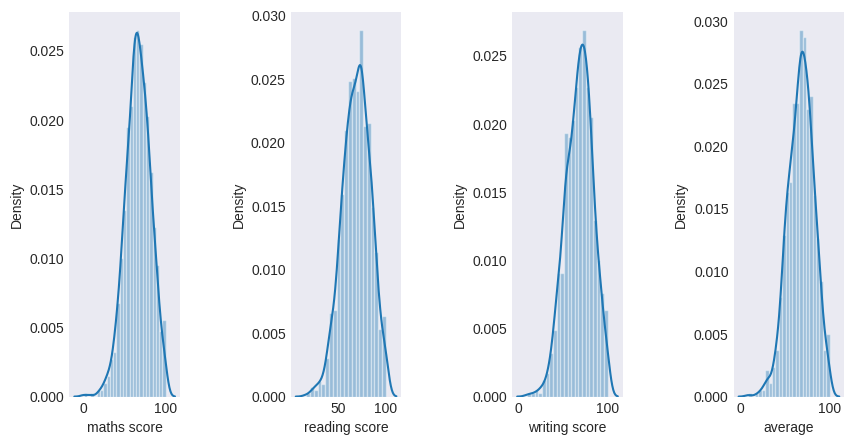

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.subplots_adjust(wspace=1.0)
plt.subplot(1,4,1)
sns.distplot(df1['maths score'])
plt.subplot(1,4,2)
sns.distplot(df1['reading score'])
plt.subplot(1,4,3)
sns.distplot(df1['writing score'])
plt.subplot(1,4,4)
sns.distplot(df1['average'])

5.DATA ANALYSIS

In [ ]:
df1.dtypes

race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
sex                             object
maths score                    float64
reading score                  float64
writing score                  float64
average                        float64
dtype: object

describes based on categories

In [ ]:
df1['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
df1['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
df1['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [ ]:
df1['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [ ]:
df1['sex'].value_counts()

F    518
M    482
Name: sex, dtype: int64

6.DATA VISUALIZATION

(-1.25, 1.25, -1.25, 1.25)

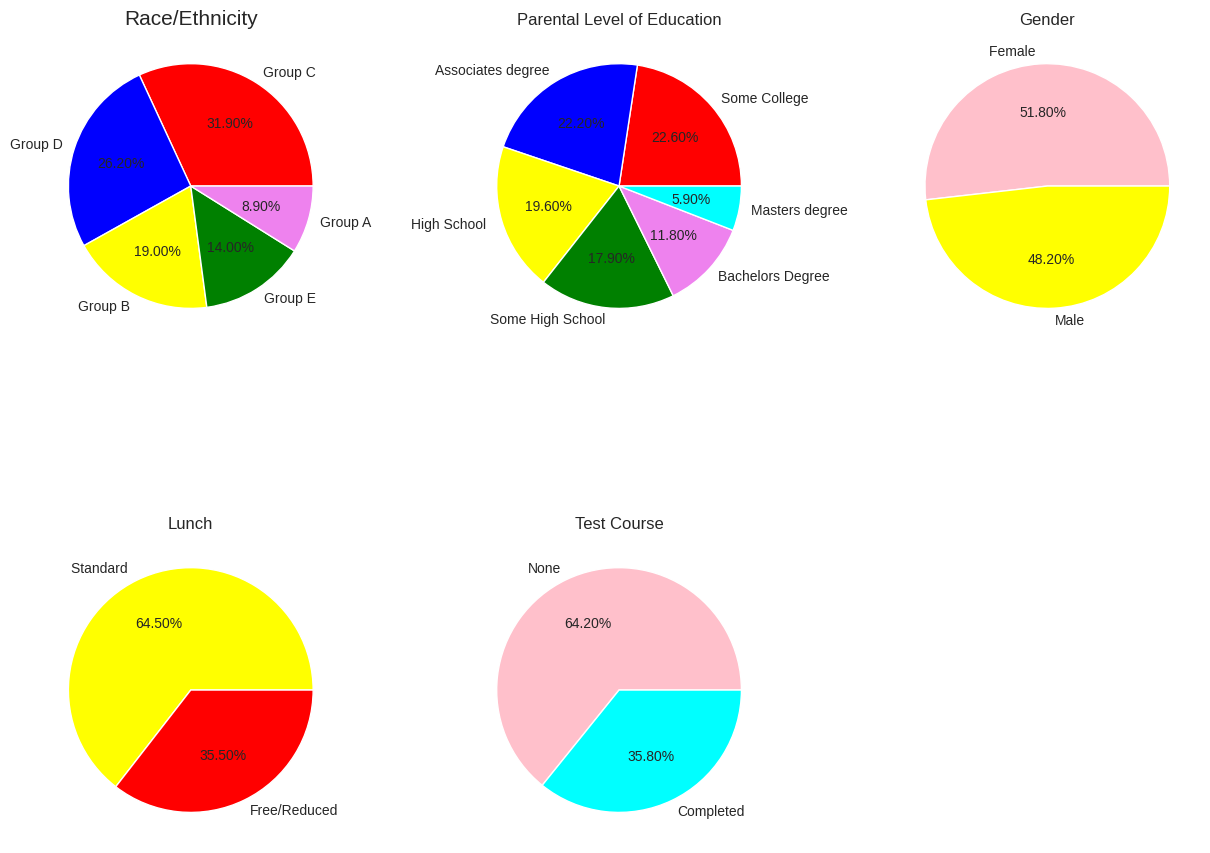

In [ ]:
plt.rcParams['figure.figsize']=(15,12)

plt.subplots_adjust(wspace=0.40)
plt.subplot(2,3,1)
plt.pie(df1['race/ethnicity'].value_counts(),labels=['Group C','Group D',
       'Group B','Group E','Group A'],
        colors=['red','blue','yellow','green','violet'],autopct='%.2f%%')
plt.title('Race/Ethnicity',fontsize=15)
plt.axis('off')

plt.subplot(2,3,2)
plt.pie(df1['parental level of education'].value_counts(),
        labels=['Some College ','Associates degree','High School ',
        'Some High School','Bachelors Degree ','Masters degree'],
       colors=['red','blue','yellow','green','violet','cyan'],autopct='%.2f%%')
plt.title('Parental Level of Education',fontsize=12)
plt.axis('off')

plt.subplot(2,3,3)
plt.pie(df1['sex'].value_counts(),labels=['Female ','Male'],
           colors=['pink','yellow'],autopct='%.2f%%')
plt.title('Gender',fontsize=12)
plt.axis('off')

plt.subplot(2,3,4)
plt.pie(df1['lunch'].value_counts(),labels=['Standard ','Free/Reduced'],
           colors=['yellow','red'],autopct='%.2f%%')
plt.title('Lunch',fontsize=12)
plt.axis('off')

plt.subplot(2,3,5)
plt.pie(df1['test preparation course'].value_counts(),labels=['None',
        'Completed'],colors=['pink','cyan'],autopct='%.2f%%')
plt.title('Test Course',fontsize=12)
plt.axis('off')

7.COMPARING THE RELATION

<Figure size 600x500 with 0 Axes>

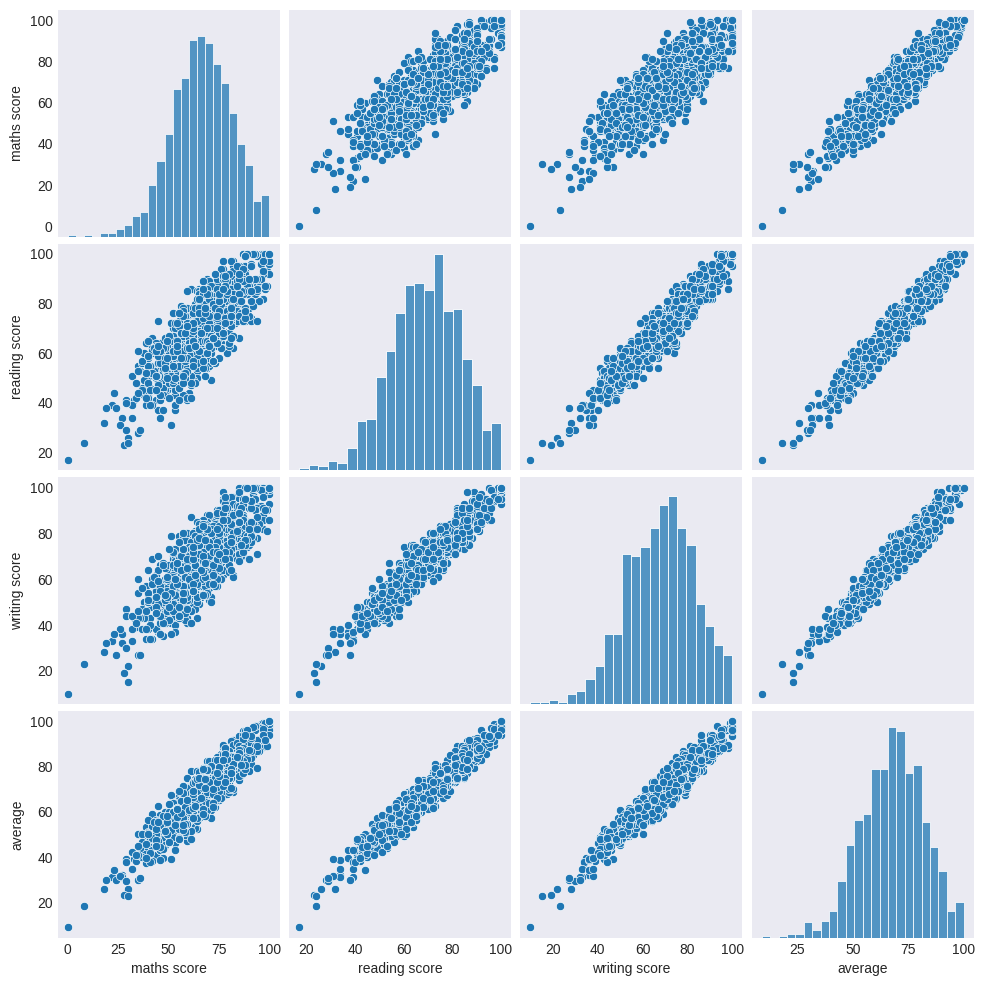

In [ ]:
plt.figure(figsize=(6,5))
sns.pairplot(df1)

8.VISUALIZATION OF CATEGORICAL TYPES

(array([ 0., 20., 40., 60., 80.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80')])

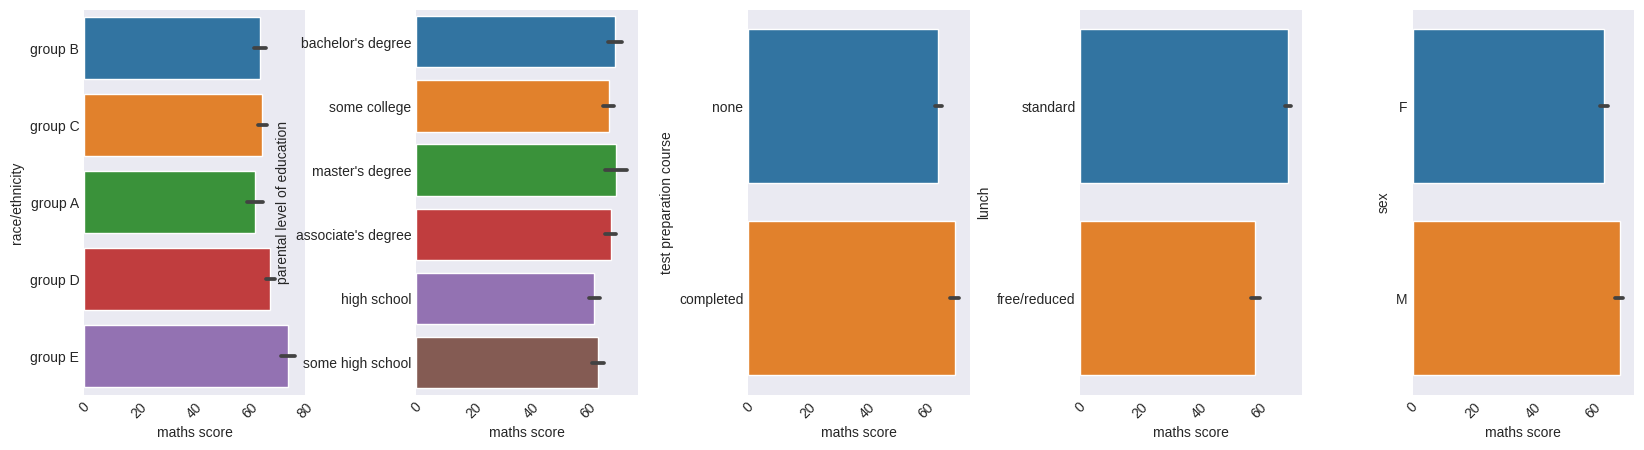

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,5,1)
sns.barplot(x='maths score',y='race/ethnicity',data=df1,orient='h')
plt.xticks(rotation=45)
plt.subplot(1,5,2)
sns.barplot(x='maths score',y='parental level of education',data=df1,orient='h')
plt.xticks(rotation=45)
plt.subplot(1,5,3)
sns.barplot(x='maths score',y='test preparation course',data=df1,orient='h')
plt.xticks(rotation=45)
plt.subplot(1,5,4)
sns.barplot(x='maths score',y='lunch',data=df1,orient='h')
plt.xticks(rotation=45)
plt.subplot(1,5,5)
sns.barplot(x='maths score',y='sex',data=df1,orient='h')
plt.xticks(rotation=45)

9.Adding new columns for PASS/FAIL

In [ ]:
df1['maths status']=np.where(df1['maths score']<40,'F','P')
df1['reading status']=np.where(df1['reading score']<40,'F','P')
df1['writing status']=np.where(df1['writing score']<40,'F','P')

In [ ]:
df1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex,maths score,reading score,writing score,average,maths status,reading status,writing status
0,group B,bachelor's degree,standard,none,F,72.0,72.0,74.0,72.7,P,P,P
1,group C,some college,standard,completed,F,69.0,90.0,88.0,82.3,P,P,P
2,group B,master's degree,standard,none,F,90.0,95.0,93.0,92.7,P,P,P
3,group A,associate's degree,free/reduced,none,M,47.0,57.0,44.0,49.3,P,P,P
4,group C,some college,standard,none,M,76.0,78.0,75.0,76.3,P,P,P


10.PASS & FAIL Analysis

In [ ]:
df1['maths status'].value_counts()

P    960
F     40
Name: maths status, dtype: int64

In [ ]:
df1['reading status'].value_counts()

P    974
F     26
Name: reading status, dtype: int64

In [ ]:
df1['writing status'].value_counts()

P    968
F     32
Name: writing status, dtype: int64

11.Visualizing categorical wise PASS/FAIL using maths score

(array([0, 1]), [Text(0, 0, 'standard'), Text(1, 0, 'free/reduced')])

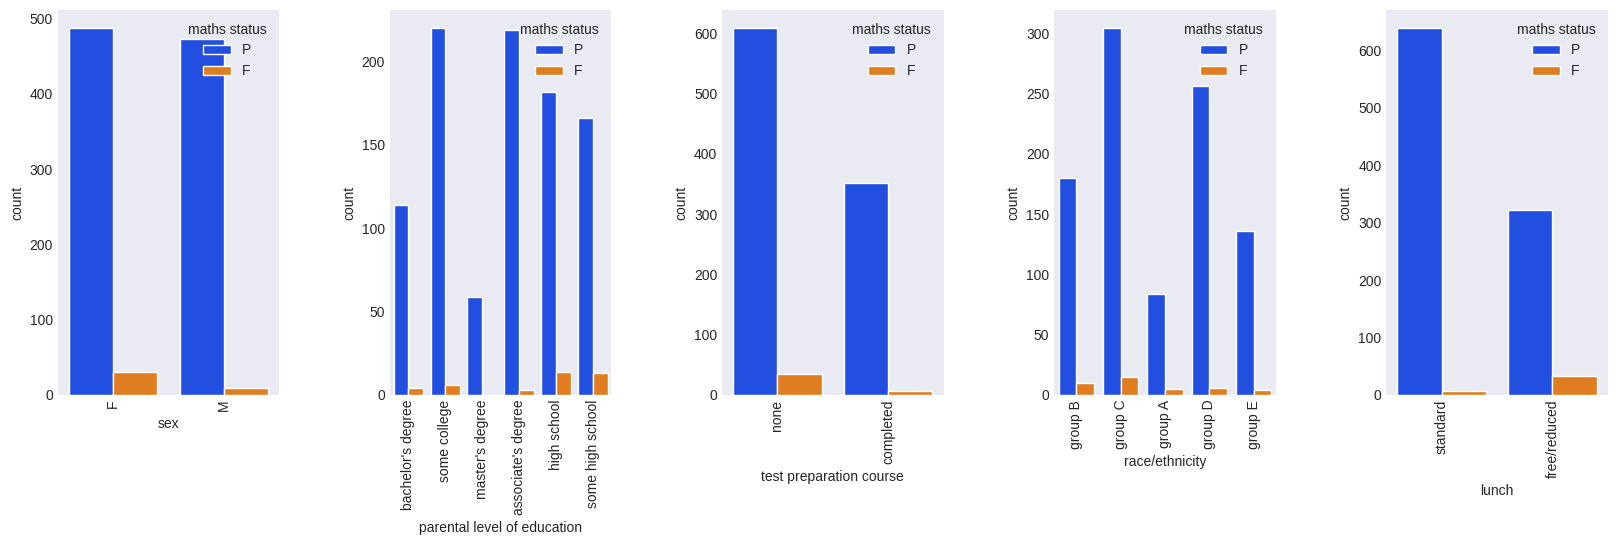

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,5,1)
sns.countplot(x=df1['sex'],data=df1,hue='maths status',palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,2)
sns.countplot(x=df1['parental level of education'],data=df1,hue='maths status',
              palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,3)
sns.countplot(x=df1['test preparation course'],data=df1,hue='maths status',
              palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,4)
sns.countplot(x=df1['race/ethnicity'],data=df1,hue='maths status',
              palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,5)
sns.countplot(x=df1['lunch'],data=df1,hue='maths status',palette='bright')
plt.xticks(rotation=90)

(-1.25, 1.25, -1.25, 1.25)

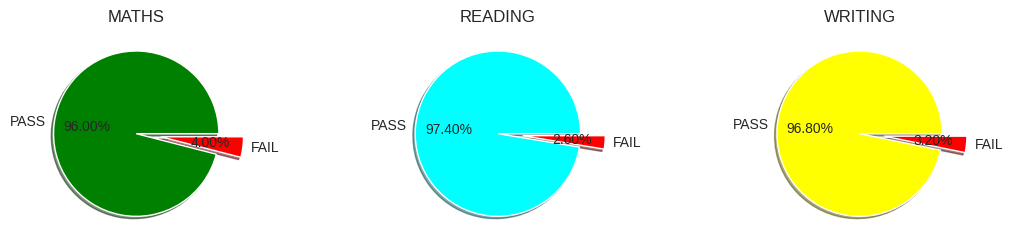

In [ ]:
plt.rcParams['figure.figsize']=(12,9)

plt.subplots_adjust(wspace=0.75)
plt.subplot(1,3,1)
plt.pie(df1['maths status'].value_counts(),labels=['PASS','FAIL'],
        colors=['green','red'],autopct='%.2f%%',explode=[0,0.3],shadow=True)
plt.title('MATHS',fontsize=12)
plt.axis('off')
plt.subplot(1,3,2)
plt.pie(df1['reading status'].value_counts(),labels=['PASS','FAIL'],
        colors=['cyan','red'],autopct='%.2f%%',explode=[0,0.3],shadow=True)
plt.title('READING',fontsize=12)
plt.axis('off')
plt.subplot(1,3,3)
plt.pie(df1['writing status'].value_counts(),labels=['PASS','FAIL'],
        colors=['yellow','red'],autopct='%.2f%%',explode=[0,0.3],shadow=True)
plt.title('WRITING',fontsize=12)
plt.axis('off')

12.Total score analysis by each student (Average)

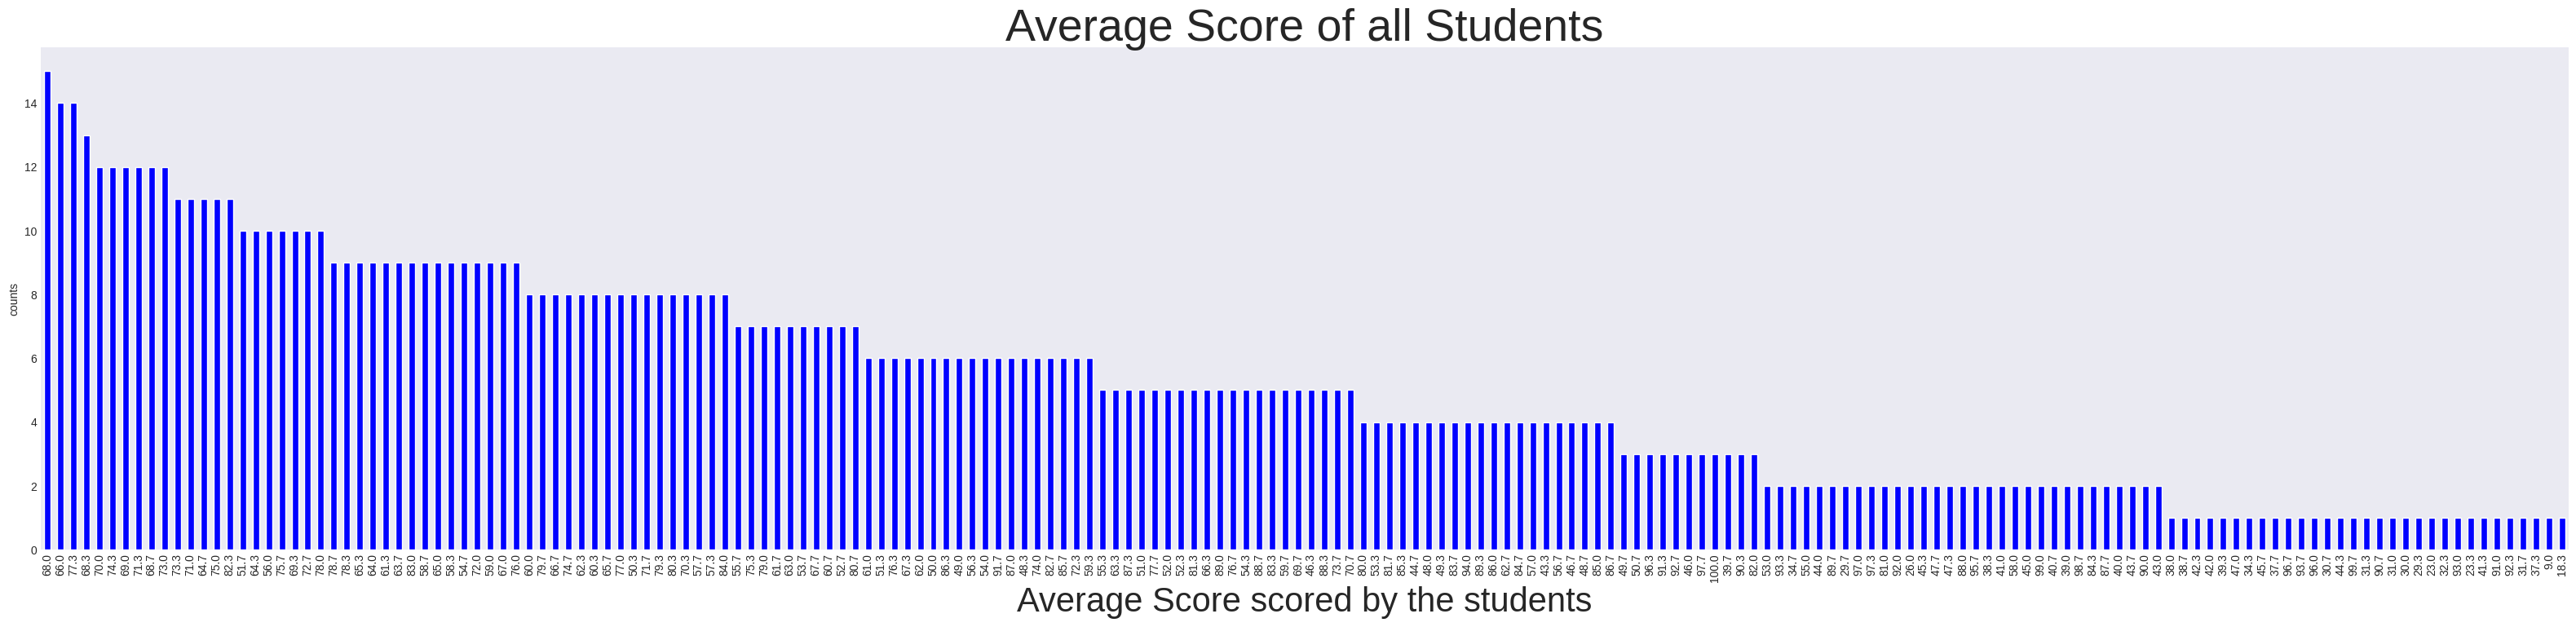

In [ ]:
plt.subplots(figsize=(15,8))
df1['average'].value_counts(normalize=True)
df1['average'].value_counts(dropna=False).plot.bar(color='blue',figsize=(40,8))
plt.title('Average Score of all Students',fontsize=40)
plt.xlabel("Average Score scored by the students",fontsize=30)
plt.ylabel('counts')
plt.show()

13.Overall Results for all the students

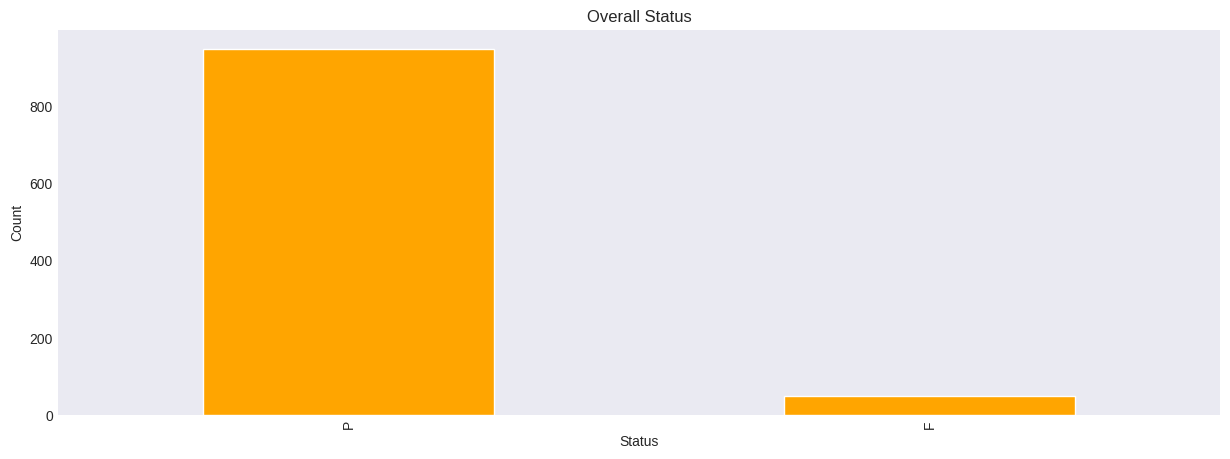

In [ ]:
df1['overall_status'] = df1.apply(lambda x :'F' if x['maths status'] =='F' or
                      x['reading status'] =='F' or x['writing status'] =='F'
                       else 'P',axis=1)
df1['overall_status'].value_counts(dropna=False).plot.bar(color='orange',figsize=(15,5))
plt.title('Overall Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

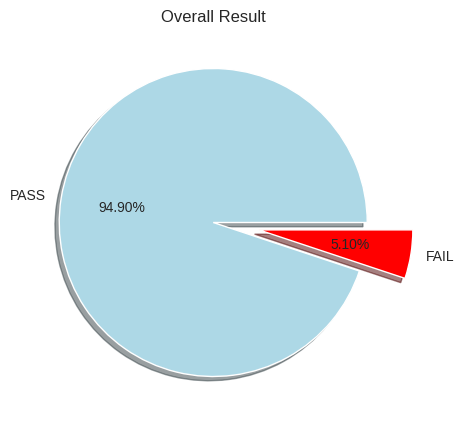

In [ ]:
plt.rcParams['figure.figsize']=(8,5)

plt.pie(df1['overall_status'].value_counts(),labels=['PASS','FAIL'],
        colors=['lightblue','red'],autopct='%.2f%%',explode=[0,0.3],shadow=True)
plt.title('Overall Result',fontsize=12)
plt.axis('off')

14.Gender wise result status

(array([0, 1]), [Text(0, 0, 'standard'), Text(1, 0, 'free/reduced')])

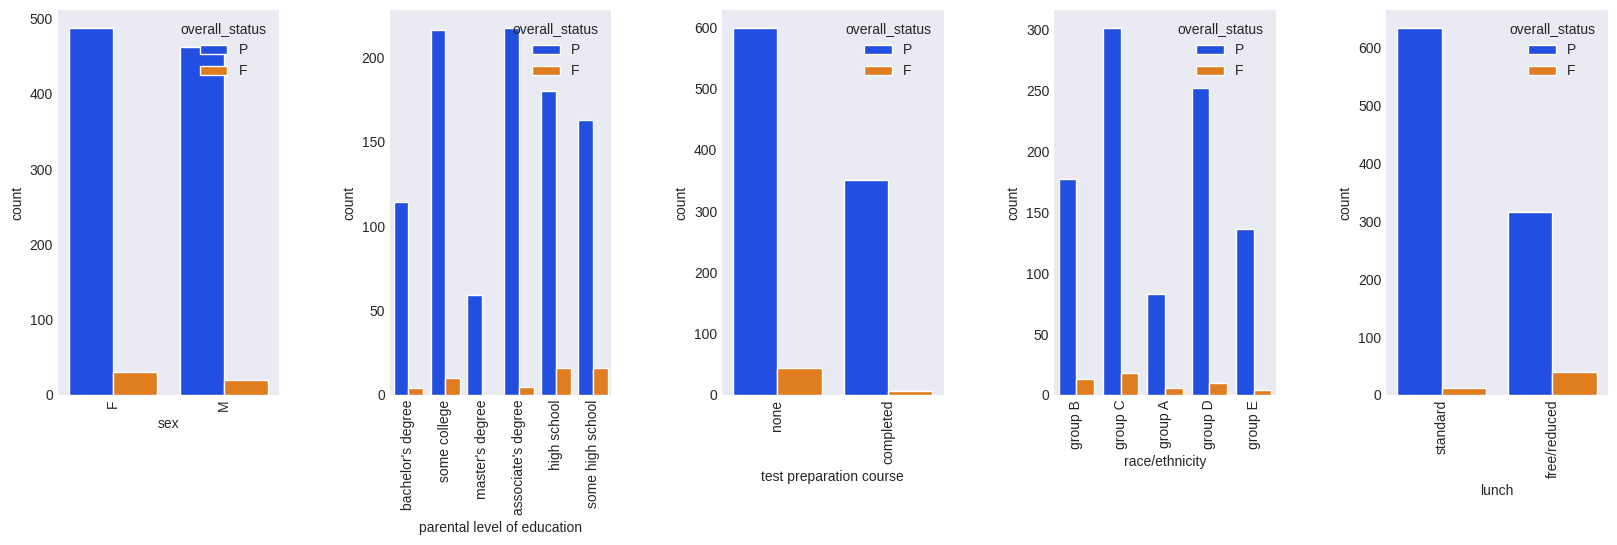

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,5,1)
sns.countplot(x=df1['sex'],data=df1,hue='overall_status',palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,2)
sns.countplot(x=df1['parental level of education'],data=df1,hue='overall_status'
,palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,3)
sns.countplot(x=df1['test preparation course'],data=df1,hue='overall_status',
              palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,4)
sns.countplot(x=df1['race/ethnicity'],data=df1,hue='overall_status',
              palette='bright')
plt.xticks(rotation=90)
plt.subplot(1,5,5)
sns.countplot(x=df1['lunch'],data=df1,hue='overall_status',palette='bright')
plt.xticks(rotation=90)

In [ ]:
df1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex,maths score,reading score,writing score,average,maths status,reading status,writing status,overall_status
0,group B,bachelor's degree,standard,none,F,72.0,72.0,74.0,72.7,P,P,P,P
1,group C,some college,standard,completed,F,69.0,90.0,88.0,82.3,P,P,P,P
2,group B,master's degree,standard,none,F,90.0,95.0,93.0,92.7,P,P,P,P
3,group A,associate's degree,free/reduced,none,M,47.0,57.0,44.0,49.3,P,P,P,P
4,group C,some college,standard,none,M,76.0,78.0,75.0,76.3,P,P,P,P


15.Fixing the grades to the students

In [ ]:
def grade(average,status):
  if status == 'F':
    return 'E'
  if (average  >=90):
    return 'O'
  if (average  >=80):
    return 'A'
  if (average  >=70):
    return 'B'
  if (average  >=60):
    return 'C'
  if (average  >=50):
    return 'D'
  else:
    return 'E'
df1['Grades_average'] =df1.apply(lambda x: grade(x['average'],
                       x["overall_status"]),axis=1)
df1['Grades_maths'] =df1.apply(lambda x: grade(x['maths score'],
                     x["maths status"]),axis=1)
df1['Grades_average'].value_counts(),df1['Grades_maths'].value_counts()

(B    261
 C    256
 D    178
 A    146
 E    107
 O     52
 Name: Grades_average, dtype: int64,
 C    268
 B    216
 D    188
 E    135
 A    135
 O     58
 Name: Grades_maths, dtype: int64)

16.Grades avg of the students

(-1.25, 1.25, -1.25, 1.25)

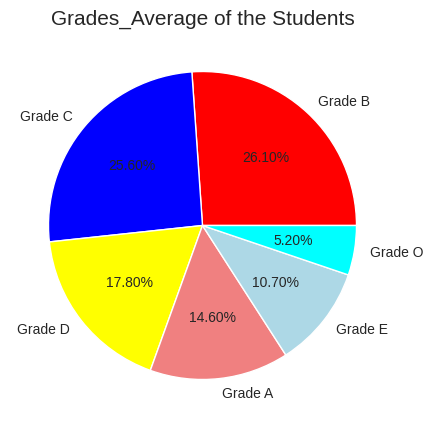

In [ ]:
plt.pie(df1['Grades_average'].value_counts(),labels=['Grade B','Grade C','Grade D','Grade A','Grade E','Grade O'],
        colors=['red','blue','yellow','lightcoral','lightblue','cyan'],autopct='%.2f%%')
plt.title('Grades_Average of the Students',fontsize=15)
plt.axis('off')

17.Maths grade

(-1.25, 1.25, -1.25, 1.25)

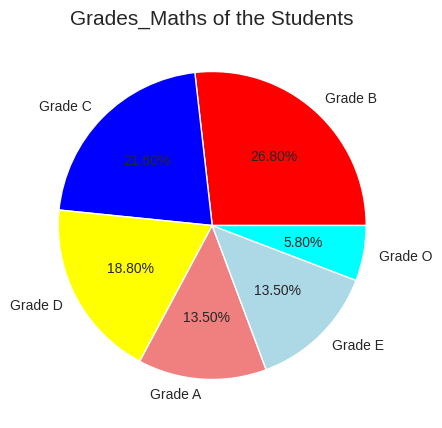

In [ ]:
plt.pie(df1['Grades_maths'].value_counts(),labels=['Grade B','Grade C',
            'Grade D','Grade A','Grade E','Grade O'],
            colors=['red','blue','yellow','lightcoral','lightblue',
            'cyan'],autopct='%.2f%%')
plt.title('Grades_Maths of the Students',fontsize=15)
plt.axis('off')

18.Analysis of grade of the students

<Axes: xlabel='Grades_average', ylabel='count'>

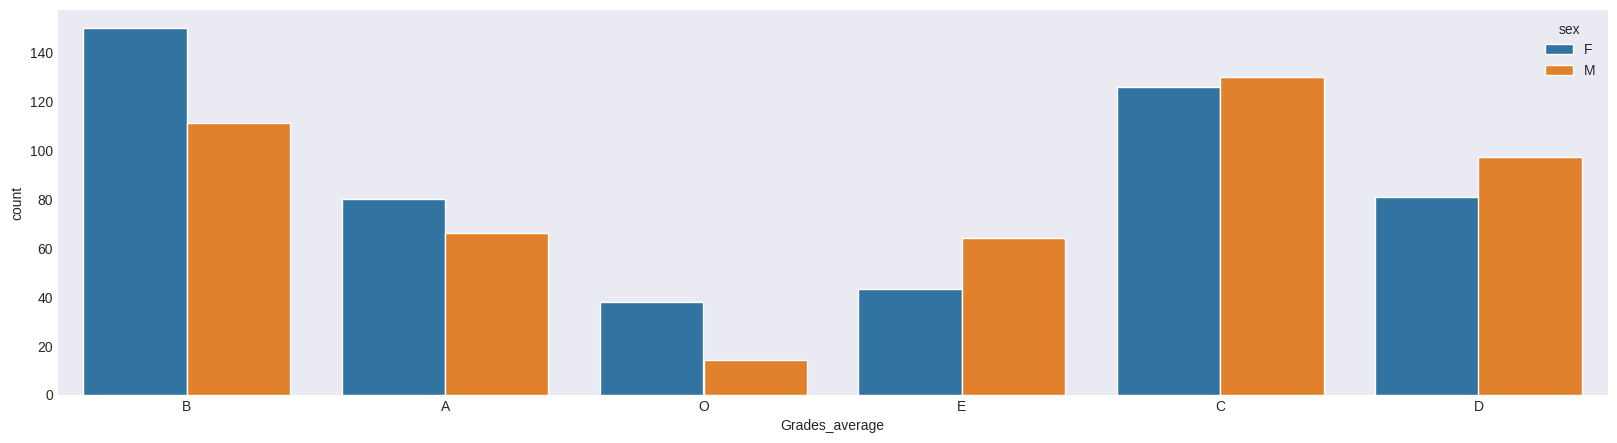

In [ ]:
sns.countplot(x=df1['Grades_average'],data=df1,hue='sex',palette='tab10')

<Axes: xlabel='count', ylabel='Grades_average'>

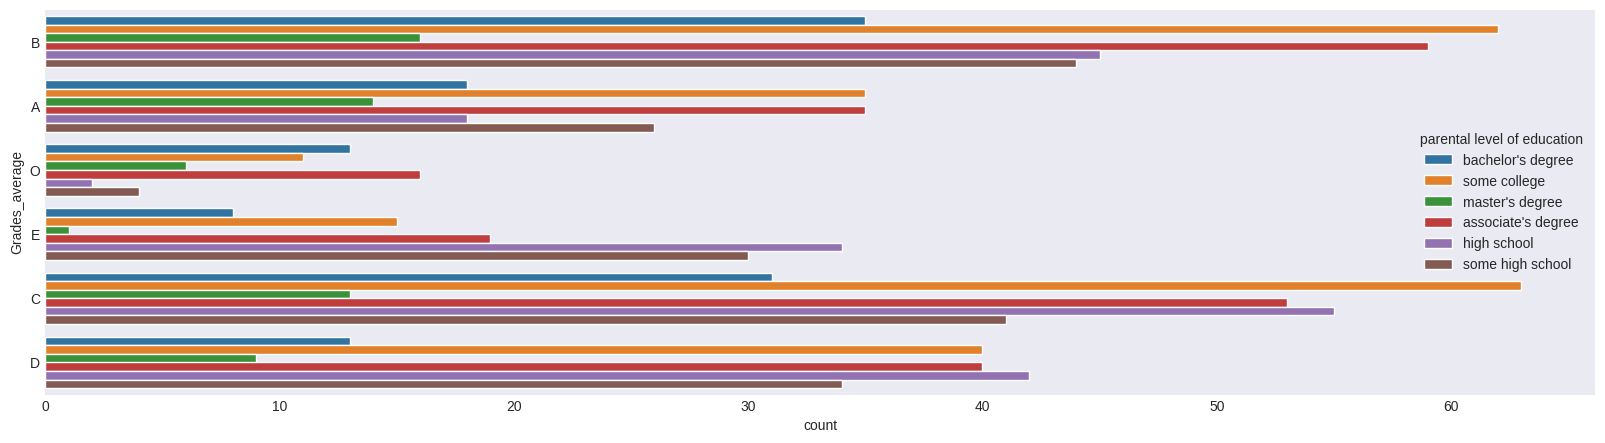

In [ ]:
sns.countplot(y=df1['Grades_average'],data=df1,hue='parental level of education',palette='tab10')

19.Correlation Matrix

<ipython-input-38-3b0671758e73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,color='blue')


Text(0.5, 1.0, 'Correlation')

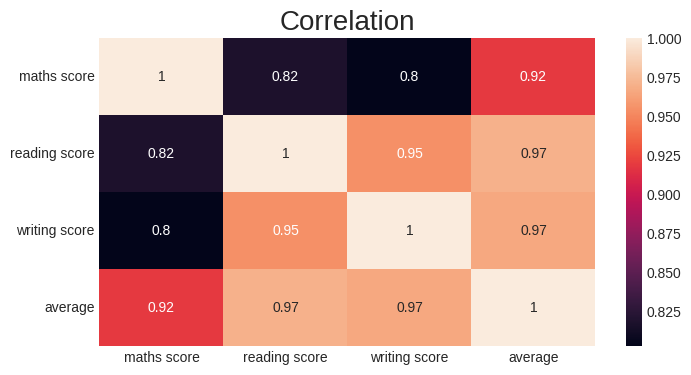

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
sns.heatmap(df1.corr(),annot=True,color='blue')
plt.title('Correlation',fontsize=20)

20.Data transformation categorical to numerical

In [ ]:
df1.dtypes

race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
sex                             object
maths score                    float64
reading score                  float64
writing score                  float64
average                        float64
maths status                    object
reading status                  object
writing status                  object
overall_status                  object
Grades_average                  object
Grades_maths                    object
dtype: object

In [ ]:
df1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex,maths score,reading score,writing score,average,maths status,reading status,writing status,overall_status,Grades_average,Grades_maths
0,group B,bachelor's degree,standard,none,F,72.0,72.0,74.0,72.7,P,P,P,P,B,B
1,group C,some college,standard,completed,F,69.0,90.0,88.0,82.3,P,P,P,P,A,C
2,group B,master's degree,standard,none,F,90.0,95.0,93.0,92.7,P,P,P,P,O,O
3,group A,associate's degree,free/reduced,none,M,47.0,57.0,44.0,49.3,P,P,P,P,E,E
4,group C,some college,standard,none,M,76.0,78.0,75.0,76.3,P,P,P,P,B,B


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1['sex']=le.fit_transform(df1['sex'])
df1['maths status']=le.fit_transform(df1['maths status'])
df1['reading status']=le.fit_transform(df1['reading status'])
df1['writing status']=le.fit_transform(df1['writing status'])
df1['overall_status']=le.fit_transform(df1['overall_status'])
df1['Grades_average']=le.fit_transform(df1['Grades_average'])
df1['Grades_maths']=le.fit_transform(df1['Grades_maths'])
df1['lunch']=le.fit_transform(df1['lunch'])
df1['test preparation course']=le.fit_transform(df1['test preparation course'])
df1['parental level of education']=le.fit_transform(df1['parental level of education'])
df1['race/ethnicity']=le.fit_transform(df1['race/ethnicity'])

In [ ]:
df1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,sex,maths score,reading score,writing score,average,maths status,reading status,writing status,overall_status,Grades_average,Grades_maths
0,1,1,1,1,0,72.0,72.0,74.0,72.7,1,1,1,1,1,1
1,2,4,1,0,0,69.0,90.0,88.0,82.3,1,1,1,1,0,2
2,1,3,1,1,0,90.0,95.0,93.0,92.7,1,1,1,1,5,5
3,0,0,0,1,1,47.0,57.0,44.0,49.3,1,1,1,1,4,4
4,2,4,1,1,1,76.0,78.0,75.0,76.3,1,1,1,1,1,1


In [ ]:
df1.shape

(1000, 15)

21.Data Split for Train Test Model
MATHS_AVERAGE PREDICTION

In [ ]:
x=df1.drop(['Grades_maths'],axis=1)
y=df1['Grades_maths']

Scaling the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test =mm.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test =mm.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_pred=model.predict(x_test)
    model_train_classification =classification_report(y_train,y_train_pred)
    model_test_classification =classification_report(y_test,y_test_pred)

    print('Model performance for Training Set')
    print( model_train_classification)
    print('Model performance for Test Set')
    print( model_test_classification)

    print(pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,
                       'Difference':y_test - y_pred}))

Model performance for Training Set
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       111
           1       0.72      0.73      0.73       166
           2       0.75      0.80      0.77       195
           3       0.70      0.84      0.76       136
           4       0.94      0.69      0.80        96
           5       0.78      0.54      0.64        46

    accuracy                           0.74       750
   macro avg       0.77      0.71      0.73       750
weighted avg       0.75      0.74      0.74       750

Model performance for Test Set
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        24
           1       0.68      0.68      0.68        50
           2       0.75      0.67      0.71        73
           3       0.61      0.83      0.70        52
           4       0.96      0.64      0.77        39
           5       0.80      0.67      0.73        12

    accurac

Scatter plot for models

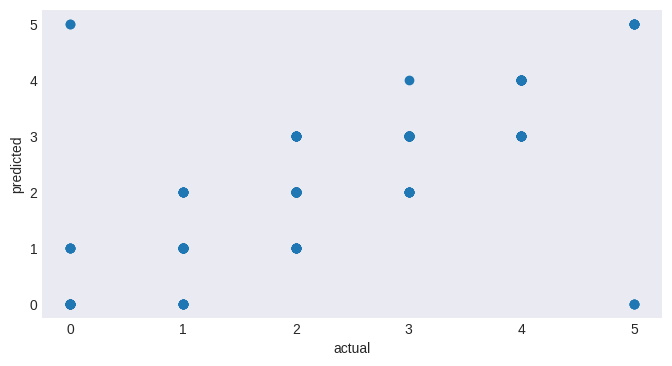

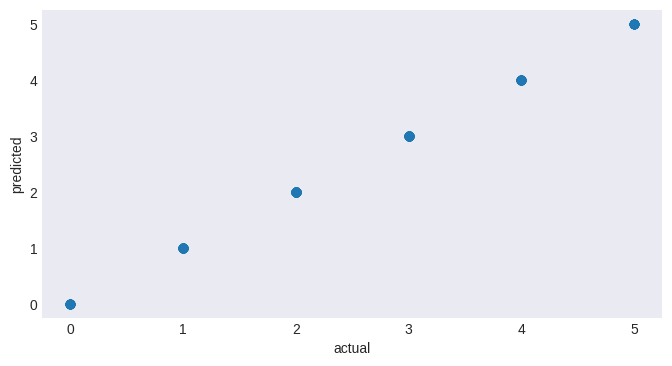

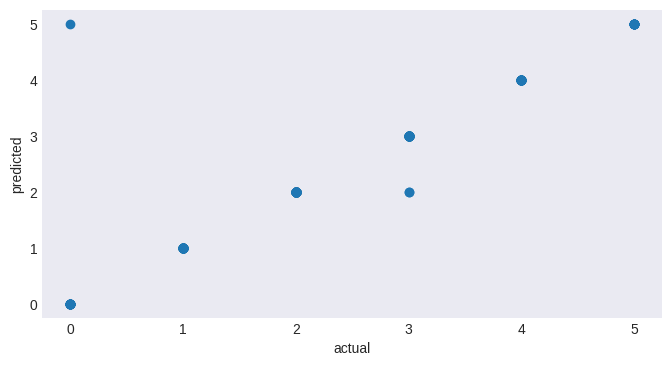

In [ ]:
models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_pred=model.predict(x_test)
    model_train_classification =classification_report(y_train,y_train_pred)
    model_test_classification =classification_report(y_test,y_test_pred)
    plt.scatter(y_test,y_pred)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()

Regression plot

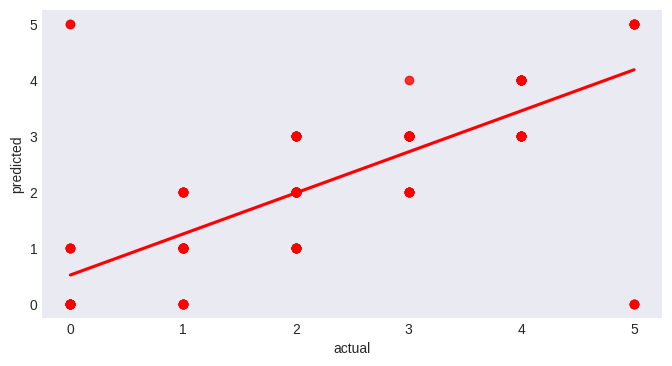

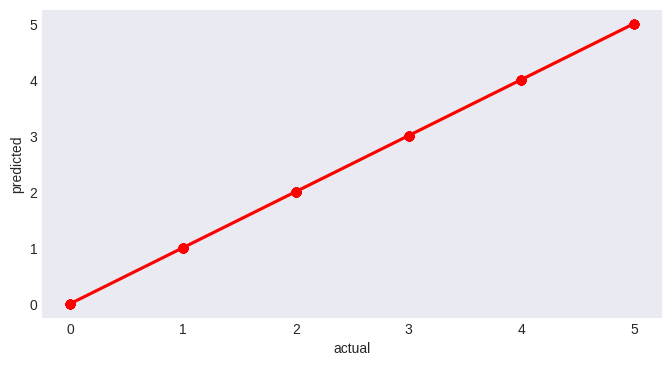

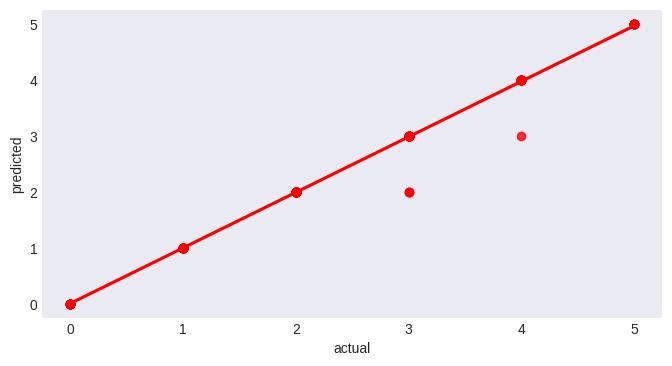

In [ ]:
models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_pred=model.predict(x_test)
    model_train_classification =classification_report(y_train,y_train_pred)
    model_test_classification =classification_report(y_test,y_test_pred)
    sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()

22.Grades average prediction

In [ ]:
df2=df1.drop(['Grades_maths'],axis=1)

In [ ]:
y1=df1['Grades_average']
x1=df1.drop(['Grades_average'],axis=1)
x1.shape,y1.shape

((1000, 14), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=45)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_train=mm.fit_transform(x1_train)
x1_test =mm.transform(x1_test)

In [ ]:
models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x1_train,y1_train)

    y1_train_pred = model.predict(x1_train)
    y1_test_pred = model.predict(x1_test)
    y1_pred=model.predict(x1_test)
    model_train_classification =classification_report(y1_train,y1_train_pred)
    model_test_classification =classification_report(y1_test,y1_test_pred)

    print('Model performance for Training Set')
    print( model_train_classification)
    print('Model performance for Test Set')
    print( model_test_classification)

    print(pd.DataFrame({'Actual Value':y1_test,'Predicted Value':y1_pred,
                       'Difference':y1_test - y1_pred}))

Model performance for Training Set
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       118
           1       0.89      0.91      0.90       191
           2       0.84      0.94      0.89       195
           3       0.78      0.84      0.81       130
           4       1.00      0.62      0.77        74
           5       0.92      0.57      0.71        42

    accuracy                           0.85       750
   macro avg       0.88      0.79      0.82       750
weighted avg       0.86      0.85      0.85       750

Model performance for Test Set
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.84      0.83      0.83        70
           2       0.81      0.95      0.87        61
           3       0.72      0.90      0.80        48
           4       1.00      0.48      0.65        33
           5       0.86      0.60      0.71        10

    accurac

Scatter plot

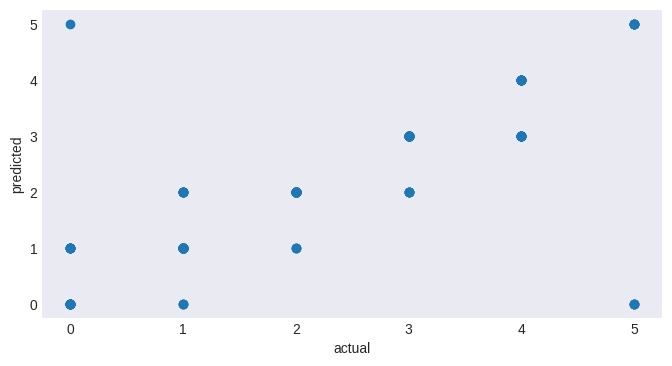

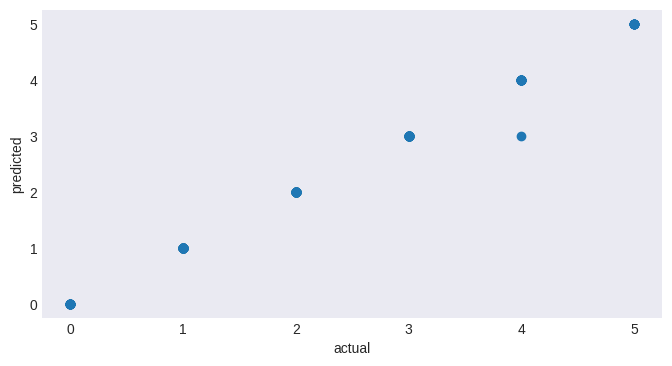

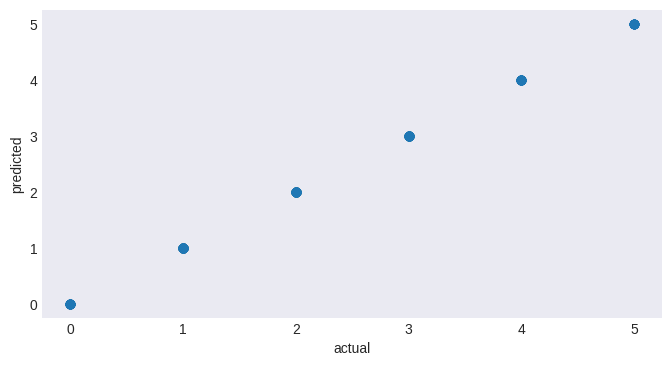

In [ ]:
models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x1_train,y1_train)

    y1_train_pred = model.predict(x1_train)
    y1_test_pred = model.predict(x1_test)
    y1_pred=model.predict(x1_test)
    model_train_classification =classification_report(y1_train,y1_train_pred)
    model_test_classification =classification_report(y1_test,y1_test_pred)
    plt.scatter(y1_test,y1_pred)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()

Regression plot

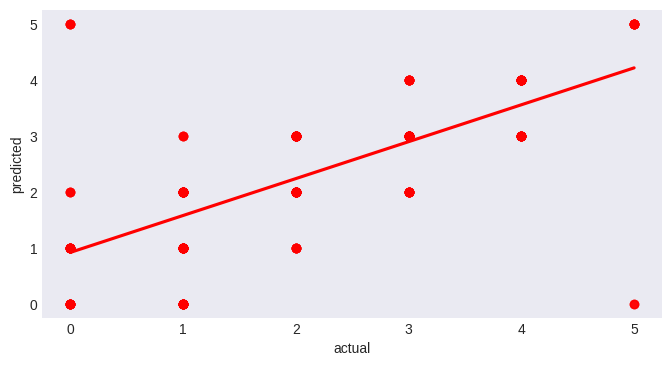

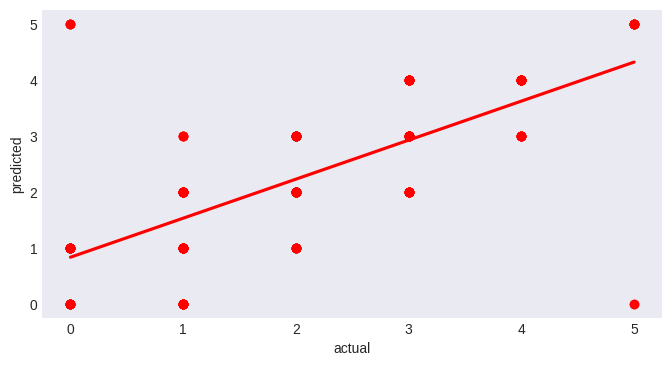

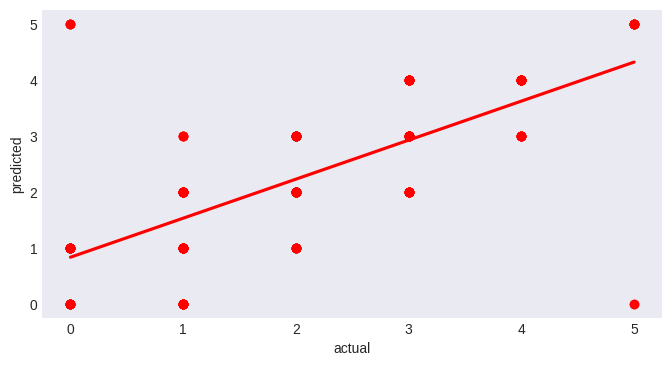

In [ ]:
models={
        "SVC":SVC(),
        "Desicision Tree":DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y1_train_pred = model.predict(x1_train)
    y1_test_pred = model.predict(x1_test)
    y1_pred=model.predict(x1_test)
    model_train_classification =classification_report(y1_train,y1_train_pred)
    model_test_classification =classification_report(y1_test,y1_test_pred)
    sns.regplot(x=y1_test,y=y1_pred,ci=None,color='red')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()

<Axes: >

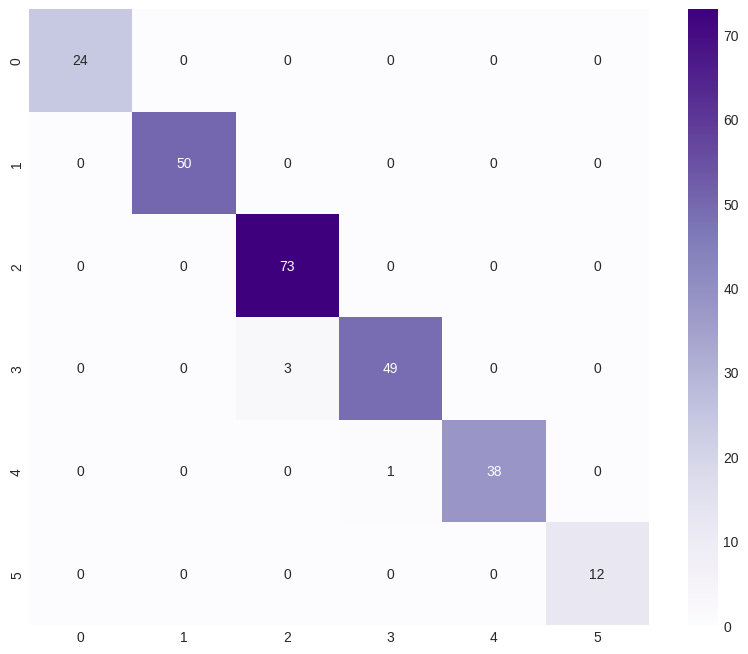

In [ ]:
plt.subplots(figsize=(10,8))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

plt.rcParams['figure.figsize']=(3,3)
sns.heatmap(cm , annot = True, cmap='Purples')